# Data Analysis 

In this notebook you can find the visualisation of:
- the total number of customers in each section
- the total number of customers in the supermarket over time.
- the total amount of customers per day
- the total number of customers in each section over time
- the number of customers at checkout over time
- the time each customer spent in the market

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

### Read data

- Read each datafile

In [6]:
monday = pd.read_csv('data/monday.csv', sep = ';')
tuesday = pd.read_csv('data/tuesday.csv', sep = ';')
wednesday = pd.read_csv('data/wednesday.csv', sep = ';')
thursday = pd.read_csv('data/thursday.csv', sep = ';')
friday = pd.read_csv('data/friday.csv', sep = ';')

In [7]:
monday.head(3)

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy


- Create readable timestamp

In [8]:
monday['timestamp'] = pd.to_datetime(monday['timestamp'])
tuesday['timestamp'] = pd.to_datetime(tuesday['timestamp'])
wednesday['timestamp'] = pd.to_datetime(wednesday['timestamp'])
thursday['timestamp'] = pd.to_datetime(thursday['timestamp'])
friday['timestamp'] = pd.to_datetime(friday['timestamp'])

- Merge dataframes, first add weekday to each df

In [9]:
monday['weekday'] = 'monday'
tuesday['weekday'] = 'tuesday'
wednesday['weekday'] = 'wednesday'
thursday['weekday'] = 'thursday'
friday['weekday'] = 'friday'

In [10]:
#monday

In [11]:
weekdays = [monday, tuesday, wednesday, thursday, friday]
week = pd.concat(weekdays)

In [12]:
week

,timestamp,customer_no,location,weekday
0,2019-09-02 07:03:00,1,dairy,monday
1,2019-09-02 07:03:00,2,dairy,monday
2,2019-09-02 07:04:00,3,dairy,monday
3,2019-09-02 07:04:00,4,dairy,monday
4,2019-09-02 07:04:00,5,spices,monday
...,...,...,...,...
5120,2019-09-06 21:50:00,1500,dairy,friday
5121,2019-09-06 21:50:00,1507,checkout,friday
5122,2019-09-06 21:50:00,1508,checkout,friday
5123,2019-09-06 21:50:00,1509,drinks,friday


**- create unique ids since each day counting starts with 1 again**

### Data Exploration

- Calculate the total number of customers in each section

In [13]:
cus_per_sec = week.groupby('location').count()

/opt/anaconda3/envs/sim/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Total amount of customers per section')

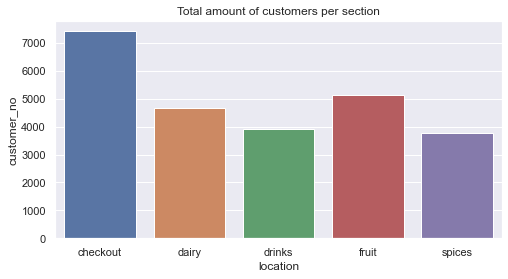

In [14]:
plt.figure(figsize=(8,4))
#sns.barplot(x='location', y='customer_no', data=cus_per_sec.reset_index())
sns.barplot(cus_per_sec.index, cus_per_sec['customer_no'])
plt.title('Total amount of customers per section')
#when crating cus_per_sec by grouping, column becomes the index 


- Calculate the total number of customers in the supermarket over time.

1. for the whole week

In [15]:
cus_all = week.groupby('timestamp').count()

/opt/anaconda3/envs/sim/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(7.0, 21.0)

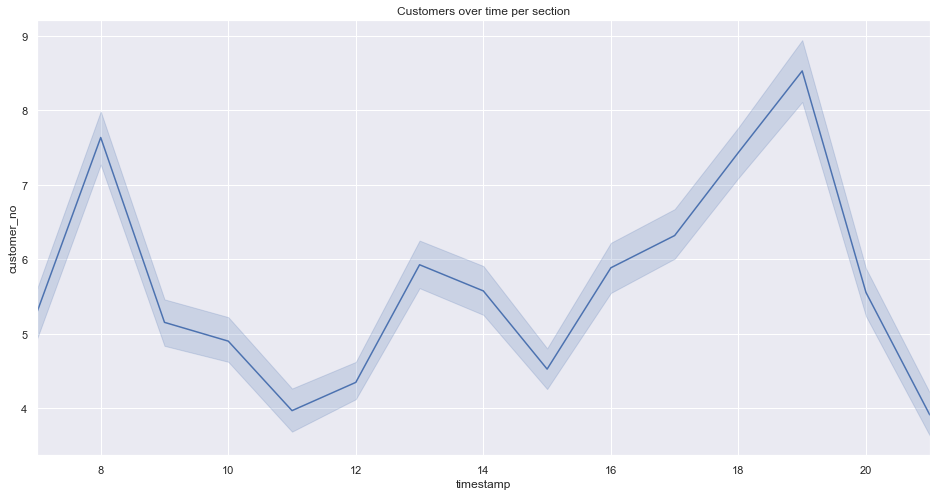

In [16]:
plt.figure(figsize=(16,8))
sns.lineplot(cus_all.index.hour, cus_all['customer_no'])
plt.title('Customers over time per section')
axes = plt.gca()
axes.set_xlim([7,21])

- 2. for each day

/opt/anaconda3/envs/sim/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/sim/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/sim/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

(7.0, 21.0)

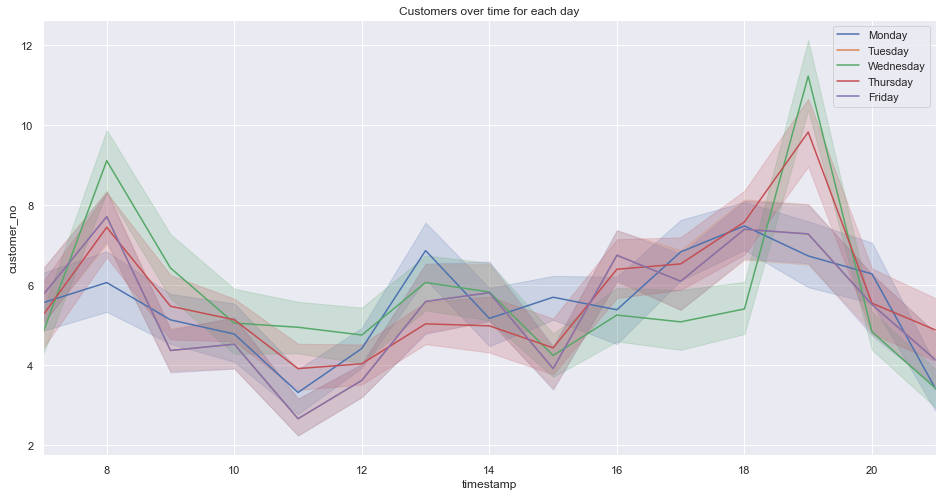

In [17]:
plt.figure(figsize=(16,8))
mo = monday.groupby('timestamp').count()
sns.lineplot(mo.index.hour, mo['customer_no'], label='Monday')
tu = tuesday.groupby('timestamp').count()
sns.lineplot(tu.index.hour, tu['customer_no'], label='Tuesday')
we = wednesday.groupby('timestamp').count()
sns.lineplot(we.index.hour, we['customer_no'], label='Wednesday')
thu = thursday.groupby('timestamp').count()
sns.lineplot(thu.index.hour, thu['customer_no'], label='Thursday')
fr = tuesday.groupby('timestamp').count()
sns.lineplot(fr.index.hour, fr['customer_no'], label='Friday')
#plt.legend('monday', ...)
plt.title ('Customers over time for each day')
axes = plt.gca()
axes.set_xlim([7,21])

- Total amount of customers per day

In [18]:
cus_per_day = week.groupby('weekday').sum()

/opt/anaconda3/envs/sim/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Total amount of customers per day')

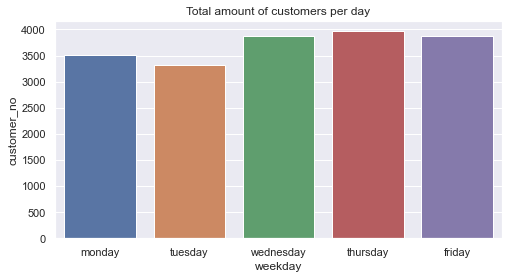

In [19]:
plt.figure(figsize=(8,4))
sns.barplot(cus_per_day.index, cus_per_day['customer_no']/1000, order=['monday', 'tuesday', 'wednesday','thursday','friday'])
plt.title('Total amount of customers per day')

- Calculate the total number of customers in each section over time

**- Sections: fruit, spices, dairy, drinks, checkout --> create new df for each section, than groupby timestamp and plot hourly**

In [20]:
fruit = week[week['location'] == 'fruit']
spices = week[week['location'] == 'spices']
dairy = week[week['location'] == 'dairy']
drinks = week[week['location'] == 'drinks']
checkout = week[week['location'] == 'checkout']
#entrance = week[week['location'] == 'entrance']

/opt/anaconda3/envs/sim/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/sim/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/sim/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

(7.0, 21.0)

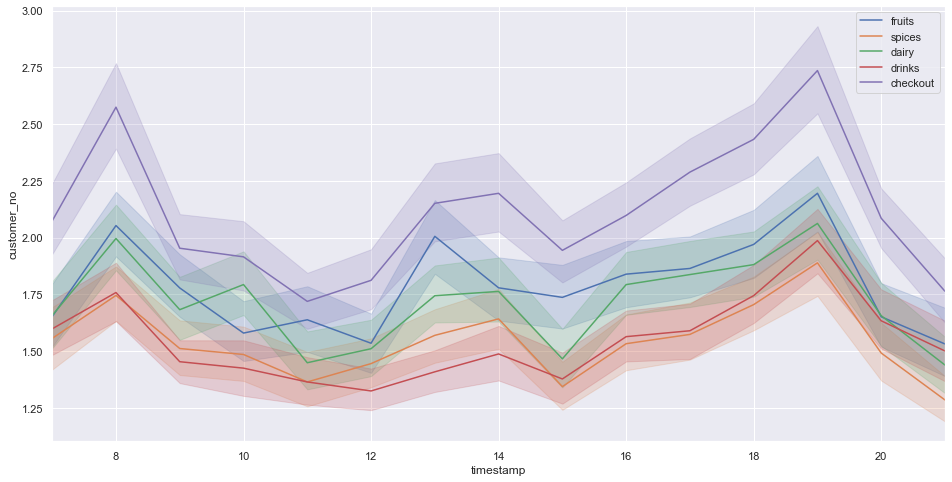

In [21]:
plt.figure(figsize=(16,8))
fruits_over_time = fruit.groupby('timestamp').count()
sns.lineplot(fruits_over_time.index.hour, fruits_over_time['customer_no'], label='fruits')
spices_over_time = spices.groupby('timestamp').count()
sns.lineplot(spices_over_time.index.hour, spices_over_time['customer_no'], label='spices')
dairy_over_time = dairy.groupby('timestamp').count()
sns.lineplot(dairy_over_time.index.hour, dairy_over_time['customer_no'], label='dairy')
drinks_over_time = drinks.groupby('timestamp').count()
sns.lineplot(drinks_over_time.index.hour, drinks_over_time['customer_no'], label='drinks')
checkout_over_time = checkout.groupby('timestamp').count()
sns.lineplot(checkout_over_time.index.hour, checkout_over_time['customer_no'], label='checkout')
axes = plt.gca()
axes.set_xlim([7,21])
#axes.set_ylim([ymin,ymax])

- Display the number of customers at checkout over time

In [22]:
checkout = week[week['location'] == 'checkout']

/opt/anaconda3/envs/sim/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(7.0, 21.0)

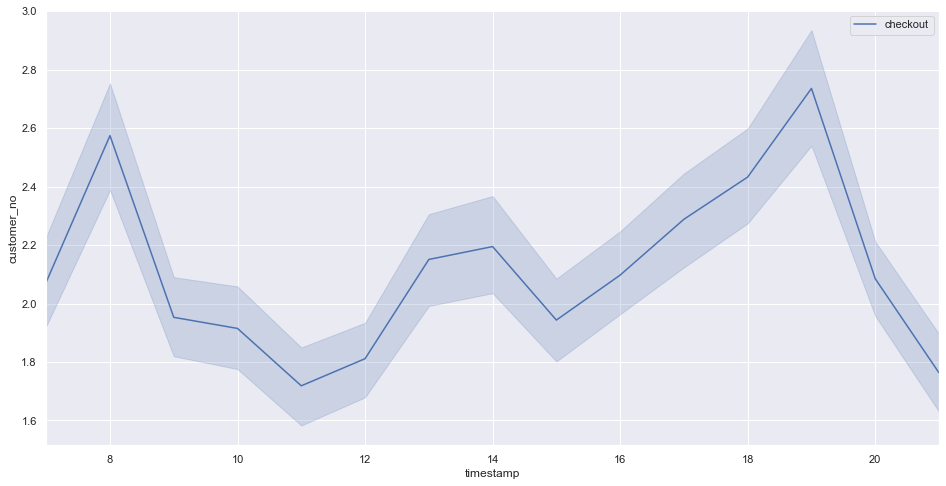

In [23]:
plt.figure(figsize=(16,8))
checkout_over_time = checkout.groupby('timestamp').count()
sns.lineplot(checkout_over_time.index.hour, checkout_over_time['customer_no'], label='checkout')
axes = plt.gca()
axes.set_xlim([7,21])

- Calculate the time each customer spent in the market